In [1]:
using MatsubaraFunctions

using CairoMakie

In [ ]:

T = 1.0 #temperature
U = 0.5 #interaction strength

**Parquet violation of the U(1) Ward identity (Chapter 9)**

In [37]:

W_Σ = MatsubaraGrid(T, 1024, Fermion)
W_Γ = MatsubaraGrid(T, 128, Fermion)

G = MatsubaraFunction(W_Σ)                # Green's function
Σ = MatsubaraFunction(W_Σ)                # complex-valued self-energy
Γ_uu = MatsubaraFunction((W_Γ, W_Γ, W_Γ))     # complex-valued vertex-component
Γ_ud = MatsubaraFunction((W_Γ, W_Γ, W_Γ))     # complex-valued vertex-component

MatsubaraFunction{3, 0, 3, ComplexF64}((MatsubaraGrid{Fermion}(1.0, MatsubaraFrequency{Fermion}[MatsubaraFrequency{Fermion}(1.0, -801.1061266653973, -128), MatsubaraFrequency{Fermion}(1.0, -794.8229413582177, -127), MatsubaraFrequency{Fermion}(1.0, -788.5397560510381, -126), MatsubaraFrequency{Fermion}(1.0, -782.2565707438584, -125), MatsubaraFrequency{Fermion}(1.0, -775.9733854366789, -124), MatsubaraFrequency{Fermion}(1.0, -769.6902001294993, -123), MatsubaraFrequency{Fermion}(1.0, -763.4070148223198, -122), MatsubaraFrequency{Fermion}(1.0, -757.1238295151402, -121), MatsubaraFrequency{Fermion}(1.0, -750.8406442079605, -120), MatsubaraFrequency{Fermion}(1.0, -744.557458900781, -119)  …  MatsubaraFrequency{Fermion}(1.0, 744.557458900781, 118), MatsubaraFrequency{Fermion}(1.0, 750.8406442079605, 119), MatsubaraFrequency{Fermion}(1.0, 757.1238295151402, 120), MatsubaraFrequency{Fermion}(1.0, 763.4070148223198, 121), MatsubaraFrequency{Fermion}(1.0, 769.6902001294993, 122), MatsubaraFreq

In [38]:
# set the self-energy
for v in W_Σ
    Σ[v] = U / 2.0 * ( - 1 - 2 * im * U * value(v) * (U^2 * (26 * exp(U/(2*T)) + exp(U/T) + 1) + 4 * value(v)^2 * (exp(U/(2*T)) + 1)^2) / ( (exp(U/(2*T)) + 1)^2 * (U^2 + 4 * value(v)^2) * (9 * U^2 + 4 * value(v)^2) ) )
end

# set the Green's function
for v in W_Σ
    G[v] = 1.0 / (im * value(v) - U / 2.0 - Σ[v])
end

In [39]:
# set the vertex component ↑↑
for v1 in W_Γ
    for v2 in W_Γ
        for v3 in W_Γ 
            Γ_uu[v1, v2, v3]  = U^2 * T * (exp(U/(2*T)) - 1) / ((exp(U/(2*T)) + 1) * (U^2 + (value(v1) - value(v3))^2))
            Γ_uu[v1, v2, v3] -= U^2 * T * (exp(U/(2*T)) - 1) / ((exp(U/(2*T)) + 1) * (U^2 + (value(v2) - value(v3))^2))
        end
        if (abs(value(v1) + value(v2)) < 1e-7)
            for v3 in W_Γ
                Γ_uu[v1, v2, v3] += 2 * U^3 * (value(v1)-value(v2)) * (U^2 - 4 * value(v1) * value(v2)) * (value(v1) + value(v2) - 2 * value(v3)) * (U^2 + 4 * value(v3) * (-value(v1) - value(v2) + value(v3))) / ( (U^2 + 4 * value(v1)^2) * (U^2 + 4 * value(v2)^2) * (U^2 + 4 * value(v3)^2) * (U^2 + 4 * (value(v1) + value(v2) - value(v3))^2) )
            end
        end
    end
end

for v3 in W_Γ 
    for v1 in W_Γ 
        if (abs(value(v1) - value(v3)) < 1e-7)
            for v2 in W_Γ 
                Γ_uu[v1, v2, v3] -= U^3 * value(v1) * value(v2) / ( (U^2 + 4 * value(v1)^2) * (U^2 + 4 * value(v2)^2) )
                Γ_uu[v1, v2, v3] -= U^3 * value(v1) * value(v3) / ( (U^2 + 4 * value(v1)^2) * (U^2 + 4 * value(v3)^2) )  
                Γ_uu[v1, v2, v3] -= 3.0 * U^3 * value(v2) * value(v3) / ( (U^2 + 4 * value(v2)^2) * (U^2 + 4 * value(v3)^2) ) 
                Γ_uu[v1, v2, v3] -= 3.0 * U^3 * value(v1) * (value(v1) + value(v2) - value(v3)) / ( (U^2 + 4 * value(v1)^2) * (U^2 + 4 * (value(v1) + value(v2) - value(v3))^2) )
                Γ_uu[v1, v2, v3] -= U^3 * value(v2) * (value(v1) + value(v2) - value(v3)) / ( (U^2 + 4 * value(v2)^2) * (U^2 + 4 * (value(v1) + value(v2) - value(v3))^2) )
                Γ_uu[v1, v2, v3] -= U^3 * value(v3) * (value(v1) + value(v2) - value(v3)) / ( (U^2 + 4 * value(v3)^2) * (U^2 + 4 * (value(v1) + value(v2) - value(v3))^2) )
                Γ_uu[v1, v2, v3] += (U / T * exp(U/(2*T)) + exp(U/T) - 1) / ( (exp(U/(2*T)) + 1)^2 / T )
            end
        end
    end


    for v2 in W_Γ 
        if (abs(value(v2) - value(v3)) < 1e-7)
            for v1 in W_Γ 
                Γ_uu[v1, v2, v3] += U^2 * T * (exp(U/(2*T)) - 1) / ( (exp(U/(2*T)) + 1) * (U^2 + (value(v2) - value(v3))^2) )
                Γ_uu[v1, v2, v3] += U^3 * value(v1) * value(v2) / ( (U^2 + 4 * value(v1)^2) * (U^2 + 4 * value(v2)^2) )  
                Γ_uu[v1, v2, v3] += 3.0 * U^3 * value(v1) * value(v3) / ( (U^2 + 4 * value(v1)^2) * (U^2 + 4 * value(v3)^2) )
                Γ_uu[v1, v2, v3] += U^3 * value(v2) * value(v3) / ( (U^2 + 4 * value(v2)^2) * (U^2 + 4 * value(v3)^2) )   
                Γ_uu[v1, v2, v3] += U^3 * value(v1) * (value(v1) + value(v2) - value(v3)) / ( (U^2 + 4 * value(v1)^2) * (U^2 + 4 * (value(v1) + value(v2) - value(v3))^2) )   
                Γ_uu[v1, v2, v3] += U^3 * value(v3) * (value(v1) + value(v2) - value(v3)) / ( (U^2 + 4 * value(v3)^2) * (U^2 + 4 * (value(v1) + value(v2) - value(v3))^2) )   
                Γ_uu[v1, v2, v3] += 3.0 * U^3 * value(v2) * (value(v1) + value(v2) - value(v3)) / ( (U^2 + 4 * value(v2)^2) * (U^2 + 4 * (value(v1) + value(v2) - value(v3))^2) )   
                Γ_uu[v1, v2, v3] -= (U / T * exp(U/(2*T)) + exp(U/T) - 1) / ( (exp(U/(2*T)) + 1)^2 / T )
            end
        end
    end
end

Γ_uu *= U / 2.0

MatsubaraFunction{3, 0, 3, ComplexF64}((MatsubaraGrid{Fermion}(1.0, MatsubaraFrequency{Fermion}[MatsubaraFrequency{Fermion}(1.0, -801.1061266653973, -128), MatsubaraFrequency{Fermion}(1.0, -794.8229413582177, -127), MatsubaraFrequency{Fermion}(1.0, -788.5397560510381, -126), MatsubaraFrequency{Fermion}(1.0, -782.2565707438584, -125), MatsubaraFrequency{Fermion}(1.0, -775.9733854366789, -124), MatsubaraFrequency{Fermion}(1.0, -769.6902001294993, -123), MatsubaraFrequency{Fermion}(1.0, -763.4070148223198, -122), MatsubaraFrequency{Fermion}(1.0, -757.1238295151402, -121), MatsubaraFrequency{Fermion}(1.0, -750.8406442079605, -120), MatsubaraFrequency{Fermion}(1.0, -744.557458900781, -119)  …  MatsubaraFrequency{Fermion}(1.0, 744.557458900781, 118), MatsubaraFrequency{Fermion}(1.0, 750.8406442079605, 119), MatsubaraFrequency{Fermion}(1.0, 757.1238295151402, 120), MatsubaraFrequency{Fermion}(1.0, 763.4070148223198, 121), MatsubaraFrequency{Fermion}(1.0, 769.6902001294993, 122), MatsubaraFreq

In [41]:
# set the vertex component ↑↓
for v1 in W_Γ
    for v2 in W_Γ
        for v3 in W_Γ 
            Γ_ud[v1, v2, v3]  = - 32 * value(v1) * (value(v1) + value(v2) - value(v3)) * U^2 * T / ( (U^2 + 4 * value(v1)^2) * (U^2 + 4 * (value(v1) + value(v2) - value(v3))^2) ) 
            Γ_ud[v1, v2, v3] +=   32 * value(v3) * (value(v1) + value(v2) - value(v3)) * U^2 * T / ( (U^2 + 4 * value(v3)^2) * (U^2 + 4 * (value(v1) + value(v2) - value(v3))^2) ) 
            Γ_ud[v1, v2, v3] -=   32 * value(v2) * (value(v1) + value(v2) - value(v3)) * U^2 * T / ( (U^2 + 4 * value(v2)^2) * (U^2 + 4 * (value(v1) + value(v2) - value(v3))^2) ) 
            Γ_ud[v1, v2, v3] +=   32 * T * U^2 * value(v1) * value(v2) / ( (U^2  + 4 * value(v1)^2) * (U^2  + 4 * value(v2)^2) ) 
            Γ_ud[v1, v2, v3] -=   32 * T * U^2 * value(v2) * value(v3) / ( (U^2  + 4 * value(v2)^2) * (U^2  + 4 * value(v3)^2) ) 
            Γ_ud[v1, v2, v3] -=   32 * T * U^2 * value(v1) * value(v3) / ( (U^2  + 4 * value(v1)^2) * (U^2  + 4 * value(v3)^2) ) 
            Γ_ud[v1, v2, v3] -= 4 * T * U^2  * (exp(U/(2*T)) - 1) / ( (exp(U/(2*T)) + 1) * (U^2 + (value(v2) - value(v3))^2) )
            Γ_ud[v1, v2, v3] += 4 * T * U^2  * (exp(U/T) - 1) / ( (exp(U/(2*T)) + 1)^2 * (U^2 + (value(v1) + value(v2))^2) )
            Γ_ud[v1, v2, v3] += 8.0 * T
        end
        if (abs(value(v1) + value(v2)) < 1e-7)
            for v3 in W_Γ 
                Γ_ud[v1, v2, v3] -= 4 * U^3 * value(v1) / (U^2 + 4 * value(v1)^2)^2
                Γ_ud[v1, v2, v3] -= 4 * U^3 * value(v3) / (U^2 + 4 * value(v3)^2)^2
                Γ_ud[v1, v2, v3] -= 8 * U^3 * value(v2) * (value(v1) + value(v2) - value(v3)) / ( (U^2 + 4 * value(v2)^2) * (U^2 + 4 * (value(v1) + value(v2) - value(v3))^2) )
                Γ_ud[v1, v2, v3] -= 8 * U^3 * value(v1) * value(v3) / ( (U^2 + 4 * value(v1)^2) * (U^2 + 4 * value(v3)^2) )
                Γ_ud[v1, v2, v3] += U * (U / T * exp(U/(2*T)) + exp(U/T) - 1) / (exp(U/(2*T)) + 1)^2
                Γ_ud[v1, v2, v3] += 4 * T * ( exp(U/T) * (value(v1) + value(v2))^2 - (value(v1) + value(v2))^2 + exp(U/(2T)) * U / T * (U^2 + (value(v1) + value(v2))^2) ) / ( (exp(U/(2*T)) + 1)^2 * (U^2 + (value(v1) + value(v2))^2) )
            end
        end
    end
end


for v3 in W_Γ 
    for v1 in W_Γ 
        if (abs(value(v1) - value(v3)) < 1e-7)
            for v2 in W_Γ 
                Γ_ud[v1, v2, v3] -= 12 * U^3 * value(v1) * value(v2) / ( (U^2 + 4 * value(v1)^2) * (U^2 + 4 * value(v2)^2) )
                Γ_ud[v1, v2, v3] -= 4 * U^3 * value(v3) * (value(v1) + value(v2) - value(v3)) / ( (U^2 + 4 * value(v3)^2) * (U^2 + 4 * (value(v1) + value(v2) - value(v3))^2) ) 
                Γ_ud[v1, v2, v3] += U * (U / T * exp(U/(2*T)) + exp(U/T) - 1) / (exp(U/(2*T)) + 1)^2
            end
        end
    end


    for v2 in W_Γ 
        if (abs(value(v2) - value(v3)) < 1e-7)
            for v1 in W_Γ 
                Γ_ud[v1, v2, v3] += 4 * U^3 * value(v1) / (U^2 + 4 * value(v1)^2)^2
                Γ_ud[v1, v2, v3] += 4 * U^3 * value(v2) / (U^2 + 4 * value(v2)^2)^2
                Γ_ud[v1, v2, v3] += 4 * T * U^2  * (exp(U/(2*T)) - 1) / ( (exp(U/(2*T)) + 1) * (U^2 + (value(v2) - value(v3))^2) )
                Γ_ud[v1, v2, v3] += 8 * U^3 * value(v2) * (value(v1) + value(v2) - value(v3)) / ( (U^2 + 4 * value(v2)^2) * (U^2 + 4 * (value(v1) + value(v2) - value(v3))^2) )
                Γ_ud[v1, v2, v3] += 8 * U^3 * value(v1) * value(v3) / ( (U^2 + 4 * value(v1)^2) * (U^2 + 4 * value(v3)^2) )
                Γ_ud[v1, v2, v3] += U * (U / T * exp(U/(2*T)) + exp(U/T) - 1) / (exp(U/(2*T)) + 1)^2
                Γ_ud[v1, v2, v3] -= 4 * T * (U / T * exp(U/(2*T)) + exp(U/T) - 1) / (exp(U/(2*T)) + 1)^2
            end
        end
    end
end

Γ_ud *=  U / 8.0

MatsubaraFunction{3, 0, 3, ComplexF64}((MatsubaraGrid{Fermion}(1.0, MatsubaraFrequency{Fermion}[MatsubaraFrequency{Fermion}(1.0, -801.1061266653973, -128), MatsubaraFrequency{Fermion}(1.0, -794.8229413582177, -127), MatsubaraFrequency{Fermion}(1.0, -788.5397560510381, -126), MatsubaraFrequency{Fermion}(1.0, -782.2565707438584, -125), MatsubaraFrequency{Fermion}(1.0, -775.9733854366789, -124), MatsubaraFrequency{Fermion}(1.0, -769.6902001294993, -123), MatsubaraFrequency{Fermion}(1.0, -763.4070148223198, -122), MatsubaraFrequency{Fermion}(1.0, -757.1238295151402, -121), MatsubaraFrequency{Fermion}(1.0, -750.8406442079605, -120), MatsubaraFrequency{Fermion}(1.0, -744.557458900781, -119)  …  MatsubaraFrequency{Fermion}(1.0, 744.557458900781, 118), MatsubaraFrequency{Fermion}(1.0, 750.8406442079605, 119), MatsubaraFrequency{Fermion}(1.0, 757.1238295151402, 120), MatsubaraFrequency{Fermion}(1.0, 763.4070148223198, 121), MatsubaraFrequency{Fermion}(1.0, 769.6902001294993, 122), MatsubaraFreq

In [43]:
# Evaluation of left-hand side, right-hand side and violation of the Ward identity
W_WI = MatsubaraGrid(T, 20, Fermion)    # grid on which to evaluate the Ward identity

WI_LHS = MatsubaraFunction((W_WI, W_WI))
WI_RHS = MatsubaraFunction((W_WI, W_WI))

set!(WI_LHS, 0.0)
set!(WI_RHS, 0.0)

for v1 in W_WI
    for v2 in W_WI
        WI_LHS[v1, v2] = Σ[v2] - Σ[v1]

        for v in W_Σ 
            WI_RHS[v1, v2] += G(value(v); extrp = ComplexF64(0.0)) * G(value(v + v1 - v2); extrp = ComplexF64(0.0))  * ( Γ_uu(value(v), value(v1), value(v + v1 - v2)) + Γ_ud(value(v), value(v1), value(v + v1 - v2) ) )
            #WI_RHS[v1, v2] += G(value(v)) * G(value(v + v1 - v2))  * (  Γ_ud(value(v), value(v1), value(v + v1 - v2)) )
            #WI_RHS[v1, v2] += G(value(v)) * G(value(v + v1 - v2))  * (  Γ_uu(value(v), value(v1), value(v + v1 - v2)) )
        end
        WI_RHS[v1, v2] *= (im * value(v2) - im * value(v1))
    end
end

Δ_WI = WI_LHS - WI_RHS

MatsubaraFunction{2, 0, 2, ComplexF64}((MatsubaraGrid{Fermion}(1.0, MatsubaraFrequency{Fermion}[MatsubaraFrequency{Fermion}(1.0, -122.52211349000193, -20), MatsubaraFrequency{Fermion}(1.0, -116.23892818282235, -19), MatsubaraFrequency{Fermion}(1.0, -109.95574287564276, -18), MatsubaraFrequency{Fermion}(1.0, -103.67255756846318, -17), MatsubaraFrequency{Fermion}(1.0, -97.38937226128358, -16), MatsubaraFrequency{Fermion}(1.0, -91.106186954104, -15), MatsubaraFrequency{Fermion}(1.0, -84.82300164692441, -14), MatsubaraFrequency{Fermion}(1.0, -78.53981633974483, -13), MatsubaraFrequency{Fermion}(1.0, -72.25663103256524, -12), MatsubaraFrequency{Fermion}(1.0, -65.97344572538566, -11)  …  MatsubaraFrequency{Fermion}(1.0, 65.97344572538566, 10), MatsubaraFrequency{Fermion}(1.0, 72.25663103256524, 11), MatsubaraFrequency{Fermion}(1.0, 78.53981633974483, 12), MatsubaraFrequency{Fermion}(1.0, 84.82300164692441, 13), MatsubaraFrequency{Fermion}(1.0, 91.106186954104, 14), MatsubaraFrequency{Fermion

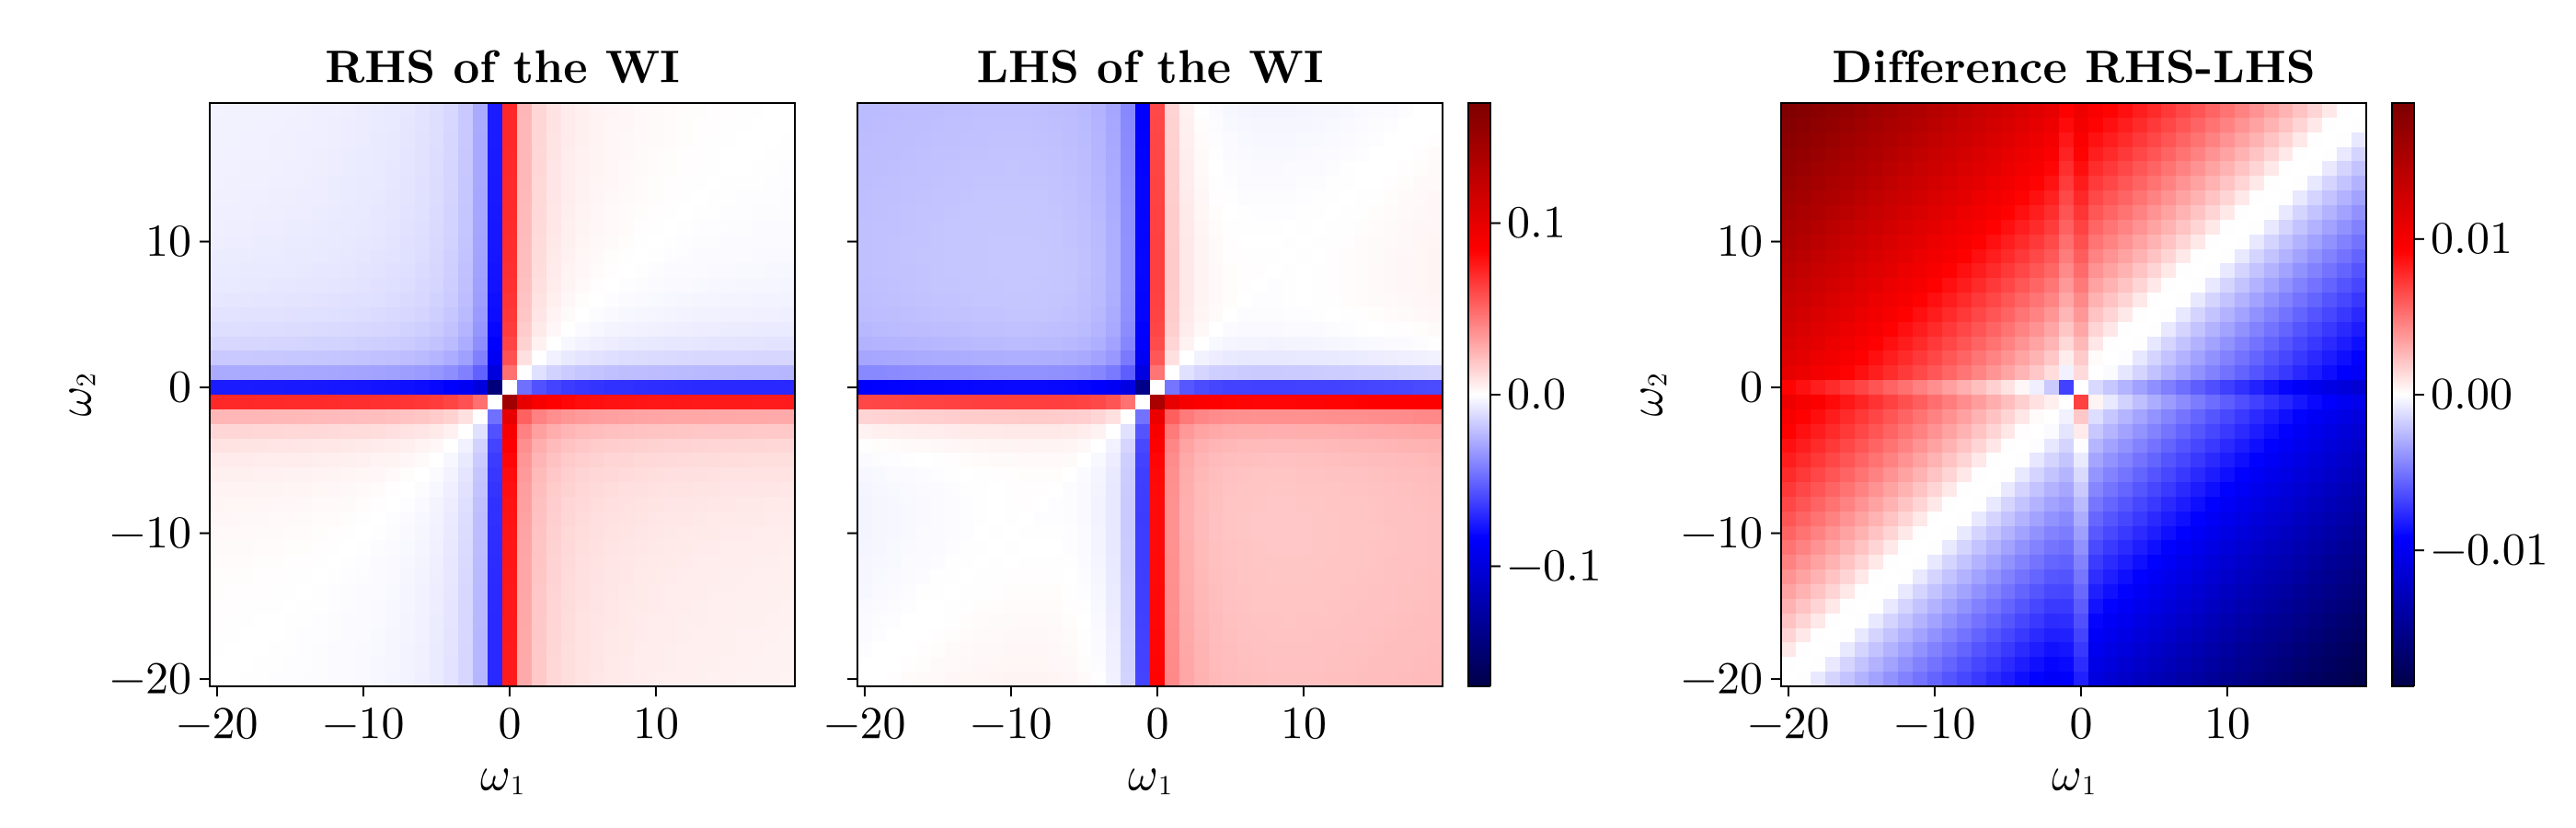

In [36]:
#Plot of the Ward identity violation for Parquet
Matsubara_indices = parent(indices(W_WI))

with_theme(theme_latexfonts(),fontsize = 25) do

    joint_limits = (-0.17, 0.17)

    f = Figure(size = (1400, 450))
    Axis(f[1, 1], title = "RHS of the WI", xlabel = L"\omega_1",  ylabel = L"\omega_2", aspect = AxisAspect(1))
    co1 = heatmap!(Matsubara_indices, Matsubara_indices, parent(imag(WI_LHS[:, :])), colormap="seismic", colorrange = joint_limits)
    

    Axis(f[1, 2], title = "LHS of the WI", xlabel = L"\omega_1", aspect = AxisAspect(1),yticklabelsvisible = false)
    co2 = heatmap!(Matsubara_indices, Matsubara_indices, parent(imag(WI_RHS[:, :])), colormap="seismic", colorrange = joint_limits)
    Colorbar(f[1, 3], colormap = "seismic",colorrange = joint_limits)

    Axis(f[1, 4], title = "Difference RHS-LHS", xlabel = L"\omega_1",  ylabel = L"\omega_2", aspect = AxisAspect(1))
    co3 = heatmap!(Matsubara_indices, Matsubara_indices, parent(imag(Δ_WI[:, :])), colormap="seismic")
    Colorbar(f[1, 5], co3)

    colgap!(f.layout, 0)

    #save("Plt_9_U05.pdf",f)

    f

end



**Second order violation of the U(1) Ward identity (Chapter 10)**

In [46]:

Epsilon2 = MatsubaraFunction(W_Σ,W_Σ)   #second order violation

# set the violation
for v in W_Σ
    for w in W_Σ
        Epsilon2[v,w] = -(1.0/4.0) * im * U^2 * (value(v)-value(w))*( (1.0/(value(v) * value(w))) - ((16.0 * value(v) * value(w))/((U^2 + 4.0 * value(v)^2) * (U^2 + 4.0 * value(w)^2))) + 2.0 * ((tanh((U)/(T * 4.0)))/(U^2 + (value(v) - value(w))^2)))
    end
end

EpsilonEv2 = MatsubaraFunction((W_WI, W_WI))


set!(EpsilonEv2, 0.0)

for v1 in W_WI
    for v2 in W_WI
        EpsilonEv2[v1,v2]=Epsilon2[v1,v2]
    end
end



**Third order violation of the U(1) Ward identity (Chapter 10)**

In [47]:
Epsilon3 = MatsubaraFunction(W_Σ,W_Σ)   #third order violation

# set the violation
for v in W_Σ
    for w in W_Σ
    Epsilon3[v,w] = - ((im * U^2 * (value(v) - value(w)))/(8.0 * value(v) * value(w))) * (2.0 + ((16.0 * (-2 + (U/T)) * value(v)^2 * value(w)^2)/((U^2 + 4.0 * value(v)^2) * (U^2 + 4.0 * value(w)^2))) - (((U^2 + 4.0 * (value(v) - value(w))^2) * tanh((U)/(T * 4.0)))/(U^2 + (value(v) - value(w))^2)))
    end
end

EpsilonEv3 = MatsubaraFunction((W_WI, W_WI))

set!(EpsilonEv3, 0.0)

for v1 in W_WI
    for v2 in W_WI
        EpsilonEv3[v1,v2]=Epsilon3[v1,v2]
    end
end


**Comparison of the violations (Chapter 10)**

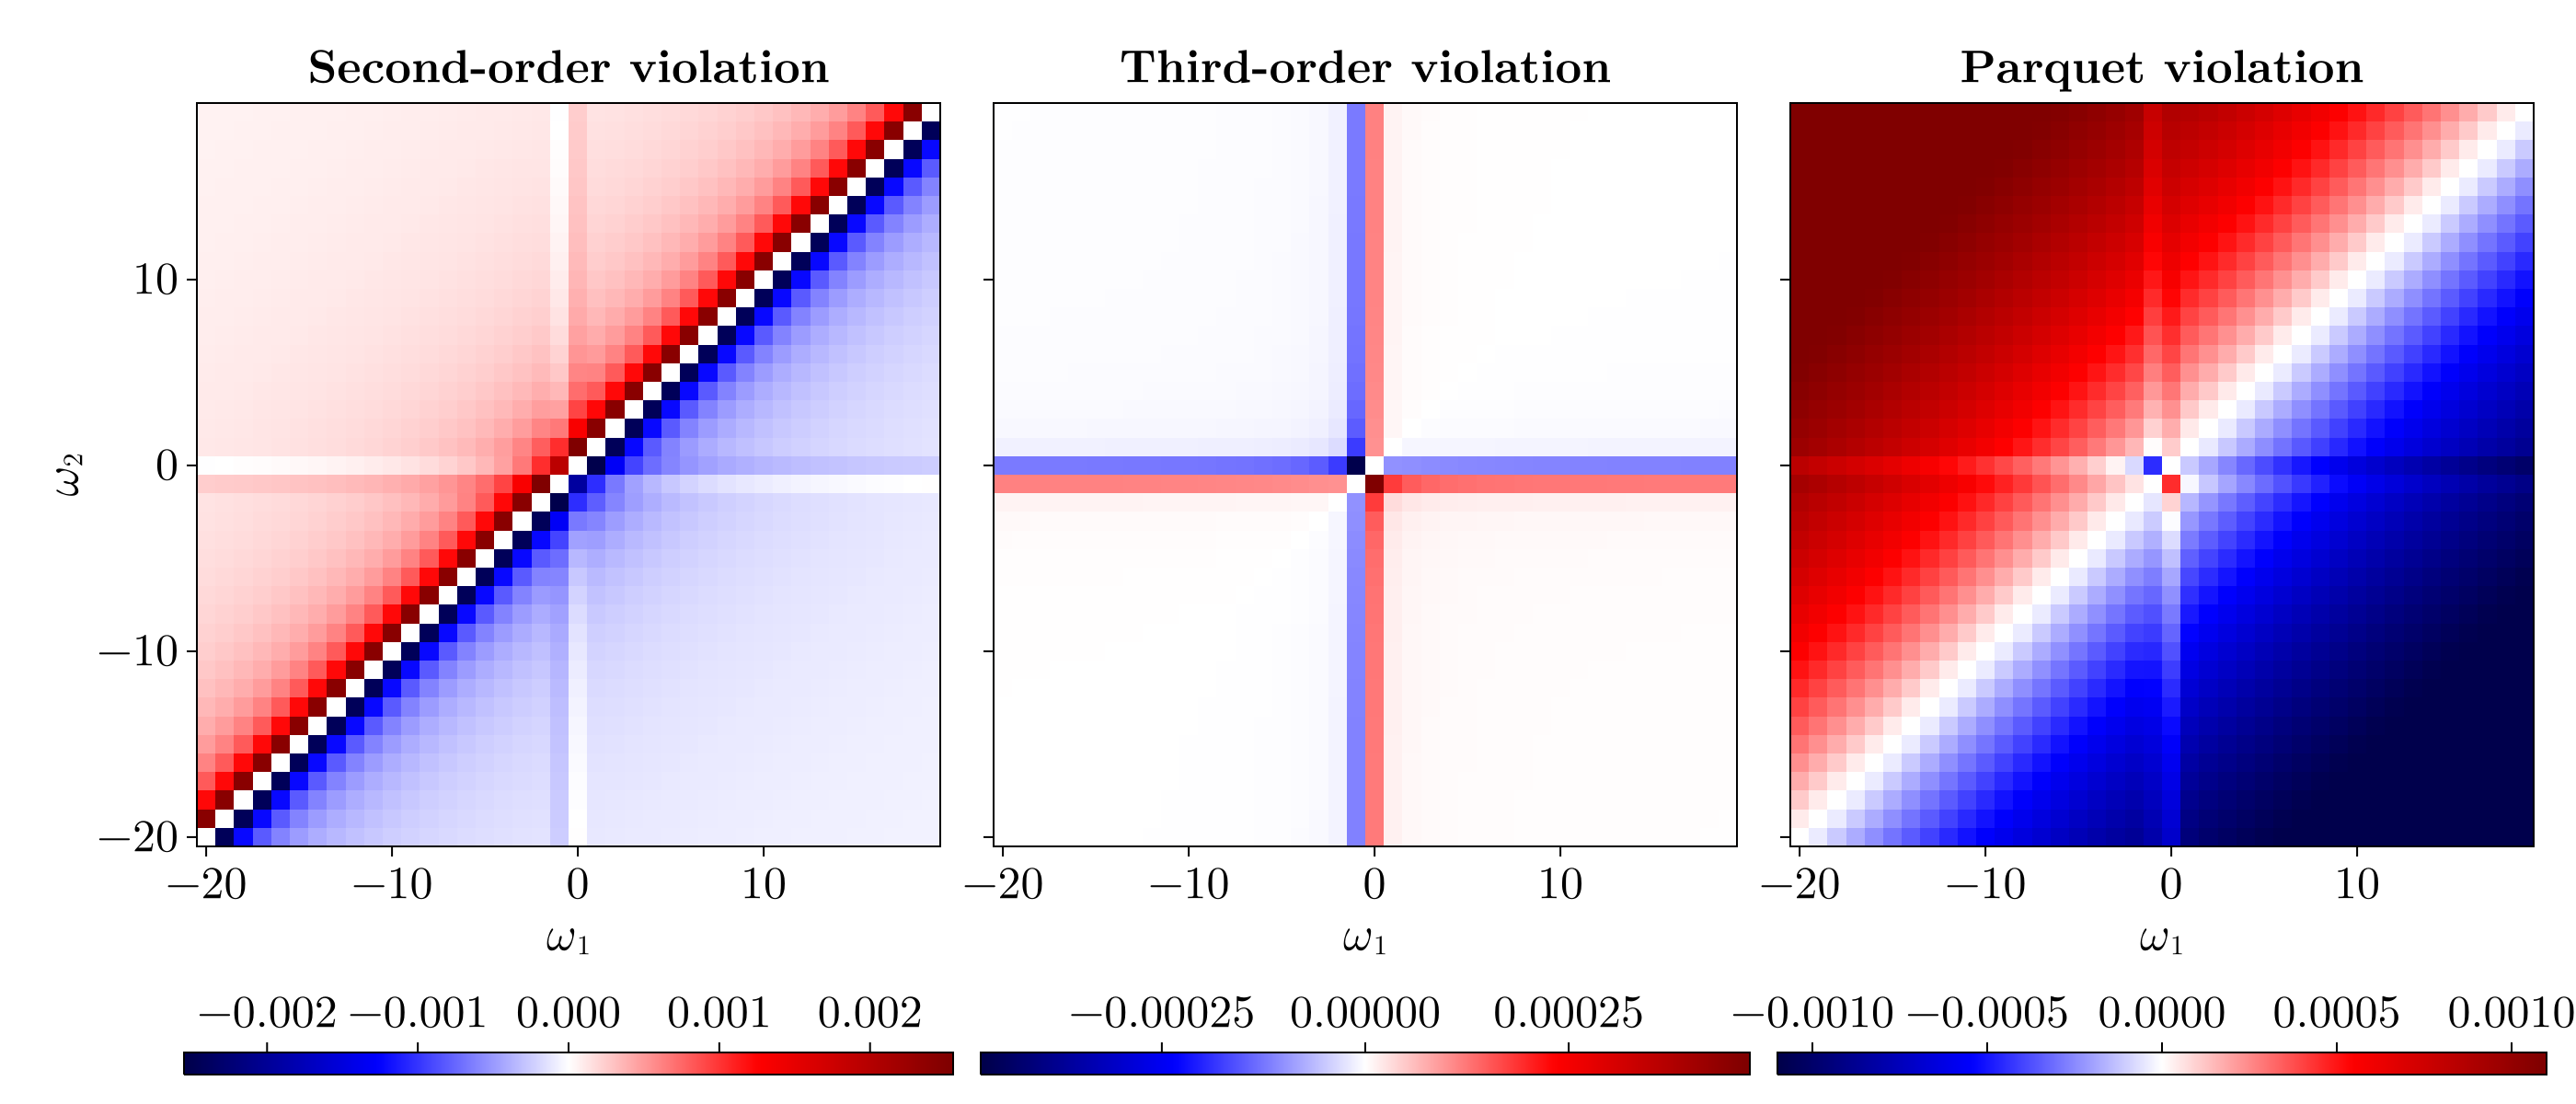

In [48]:
Matsubara_indices = parent(indices(W_WI))

with_theme(theme_latexfonts(),fontsize = 25) do
    g = Figure(size = (1400, 600))
    Axis(g[1, 1],  title = "Second-order violation", xlabel = L"\omega_1",  ylabel = L"\omega_2", aspect = AxisAspect(1))
    co1 = heatmap!(Matsubara_indices, Matsubara_indices, parent(imag(EpsilonEv2[:, :])), colormap="seismic")
    Colorbar(g[2, 1], co1, vertical = false)

    Axis(g[1, 2], title = "Third-order violation", xlabel = L"\omega_1",yticklabelsvisible = false, aspect = AxisAspect(1))
    co2 = heatmap!(Matsubara_indices, Matsubara_indices, parent(imag(EpsilonEv3[:, :])), colormap="seismic")
    Colorbar(g[2, 2], co2, vertical = false)

    limits= (-0.0011, 0.0011)
    Axis(g[1, 3], title = "Parquet violation", xlabel = L"\omega_1", yticklabelsvisible = false,  aspect = AxisAspect(1))
    co3 = heatmap!(Matsubara_indices, Matsubara_indices, parent(imag(Δ_WI[:, :])), colormap="seismic",colorrange = limits)
    Colorbar(g[2, 3], colorrange = limits, colormap = "seismic", vertical = false)

    colgap!(g.layout, 10)

    save("Plt_10_violations_U05.pdf",g)

    g
    
end